In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
datasets = {};
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        datasets[filename] = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
training_dataset = pd.read_csv(datasets['train.csv'])
test_dataset = pd.read_csv(datasets['test.csv'])

Accuracy:  0.9888014444327563
Intercept:  -0.10726546430097272
Slope:  [1.00065638]


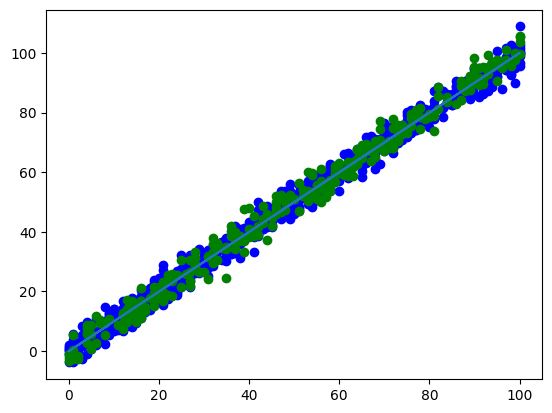

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Clean training data and transform
training_dataset.dropna(inplace = True)
train_x_values = training_dataset['x'].values
train_x_reshaped = train_x_values.reshape(-1, 1)

## Transform testing data
test_x_values = test_dataset['x'].values
test_x_reshaped = test_x_values.reshape(-1, 1)

## Build and train model
linear_regression_model = LinearRegression()
linear_regression_model.fit(train_x_reshaped, training_dataset['y'])

## Test model
y_predicted = linear_regression_model.predict(test_x_reshaped)
plt.scatter(training_dataset['x'], training_dataset['y'], color = 'blue')
plt.scatter(test_dataset['x'], test_dataset['y'], color = 'green')
plt.plot(test_dataset['x'], y_predicted)
print("Accuracy: ", linear_regression_model.score(test_x_reshaped, test_dataset['y']))
print("Intercept: ", linear_regression_model.intercept_)
print("Slope: ", linear_regression_model.coef_)